In [73]:
# Importing Lib

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv(r'C:\Users\Dan\Documents\Data analyst protfolio\movies.csv')

In [74]:
# Looking at data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [75]:
# Checking for missing data
# df = df.dropna() drops null values

df = df.dropna() 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [76]:
# Checking data types for the columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [26]:
# Changing the data type of columns - in the data set large values end with .0, I want to change this.

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [77]:
# As you can see below, the budget and gross values no longer end in .0

df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [72]:
# The year and released columns are the same. However, sometimes they do not match. I am going to change this to 'yearcorrect'

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df

AttributeError: Can only use .str accessor with string values!

In [78]:
# Sorting by gross profit 

df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [ ]:
# Changing size of table to max

pd.set_option('display.max_rows', None)

In [38]:
# Dropping any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

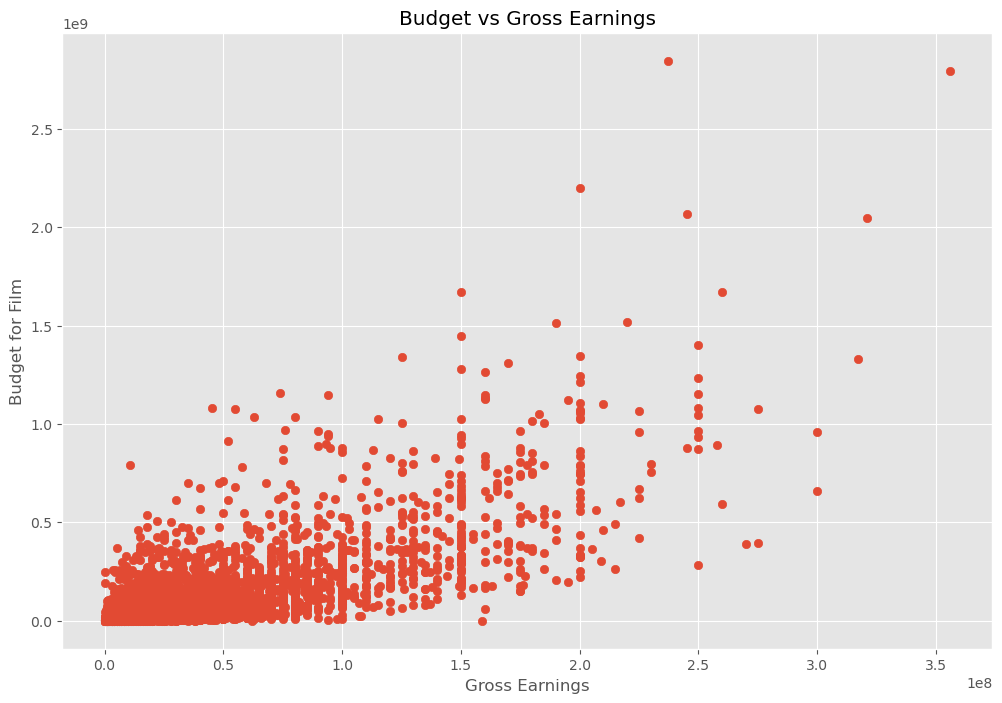

In [42]:
# Running some correlations on the data. Hypothesis = budgit and gross will have a high correlation
# Predicted that the company will also be highly correlated.

# Building a scatterplot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

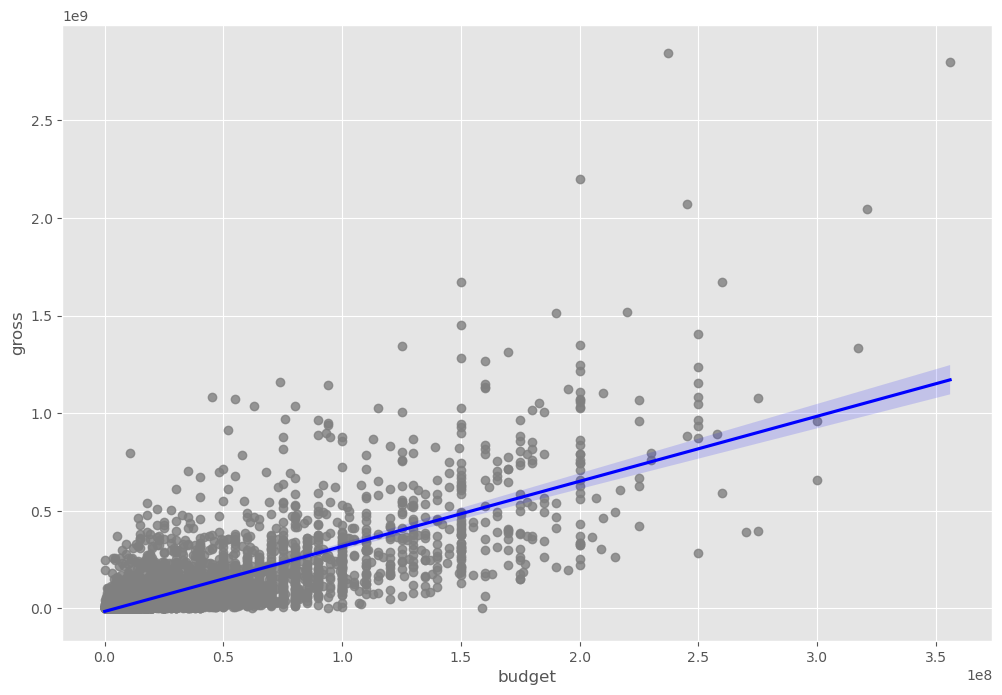

In [45]:
# Plotting rgression line of budget vs gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "grey"}, line_kws={"color":"blue"})

In [48]:
# Checking correlation values using Pearsons Correlation - on numerical fields

#Pearson, Kendall, Spearman 

df.corr(method='pearson') 

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

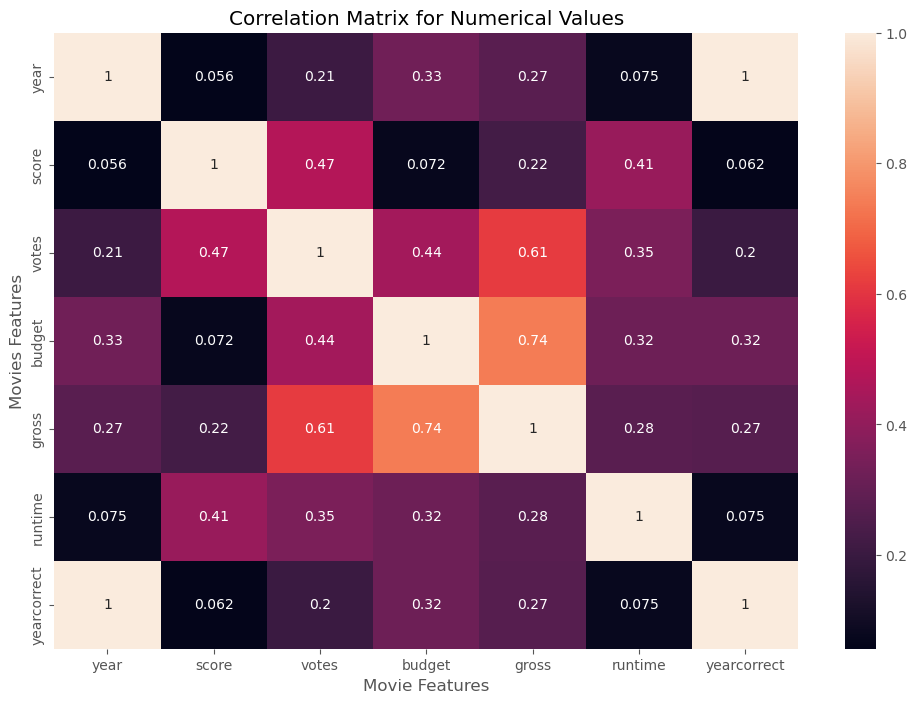

In [51]:
# High correlation between gross and budget r = .74
# Visualise correlation 

correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Values')
plt.xlabel('Movie Features')
plt.ylabel('Movies Features')
plt.show()

In [52]:
# Not all of the data in the table below is 'numerical' so it cannot be correlated. However, I can change this:

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [79]:
# Changing text data into numerical values

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    
df_numerized.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country      budget        gross  company  runtime  
0   699       46  19000000.0   46998772.0     1426    146.0  
1   214       47   4500000.0   58853106.0      452    104.0  
2  1157       47  18000000.0  538375067.0      945    124.0  
3  1474       47   3500000.0   83453539.0     1108     88.0  
4   271       47   6000000.0   39846344.0     1083     98.0

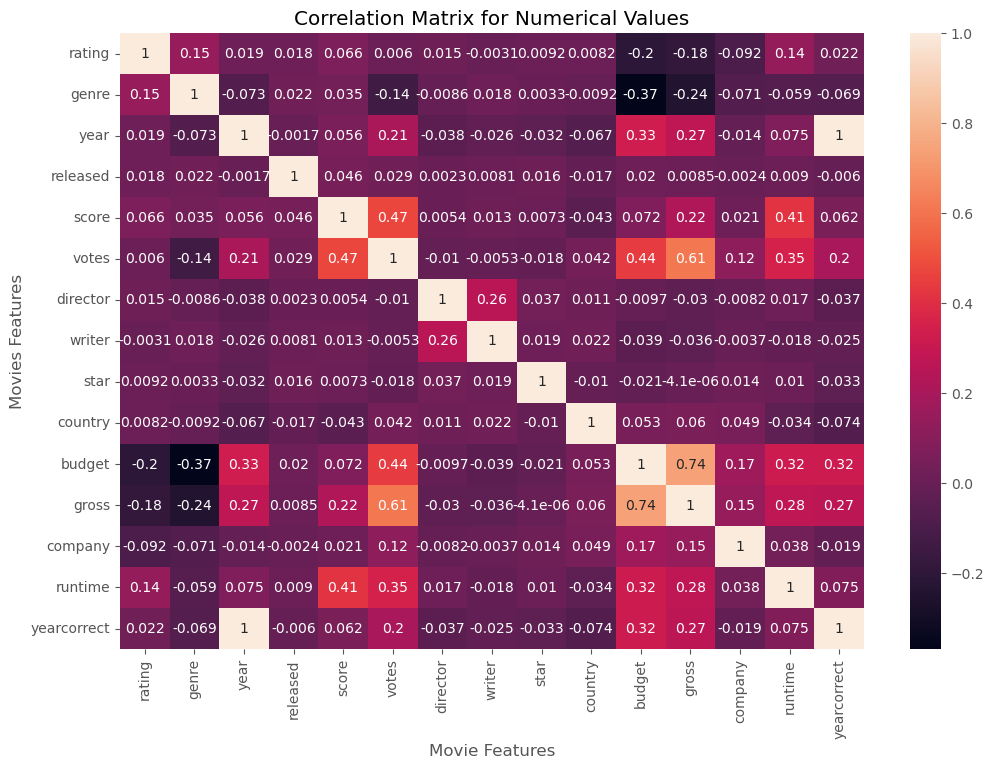

In [60]:
# Re-running correaltions with numerical values 
# Anything greater than .40 indicates a reasonably strong correlation

correlation_matrix = df_numerized.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Values')
plt.xlabel('Movie Features')
plt.ylabel('Movies Features')
plt.show()

In [61]:
# Cherry picking highest correlation to view quickly (as opposed to eye balling large table)

df_numerized.corr()

rating     genre      year  released     score     votes  \
rating       1.000000  0.147796  0.019499  0.018083  0.065983  0.006031   
genre        0.147796  1.000000 -0.073167  0.022142  0.035106 -0.135990   
year         0.019499 -0.073167  1.000000 -0.001740  0.056386  0.206021   
released     0.018083  0.022142 -0.001740  1.000000  0.045874  0.028833   
score        0.065983  0.035106  0.056386  0.045874  1.000000  0.474256   
votes        0.006031 -0.135990  0.206021  0.028833  0.474256  1.000000   
director     0.014656 -0.008553 -0.038354  0.002308  0.005413 -0.010376   
writer      -0.003149  0.017578 -0.025908  0.008072  0.012843 -0.005316   
star         0.009196  0.003341 -0.032157  0.015706  0.007296 -0.017638   
country      0.008230 -0.009164 -0.066748 -0.017228 -0.043051  0.041551   
budget      -0.203946 -0.368523  0.327722  0.019952  0.072001  0.439675   
gross       -0.181906 -0.244101  0.274321  0.008501  0.222556  0.614751   
company     -0.092357 -0.071334 -0.014333 -0.002407  0.020656  0.118470   
runtime      0.140792 -0.059237  0.075077  0.008975  0.414068  0.352303   
yearcorrect  0.022021 -0.069147  0.998726 -0.005989  0.061923  0.203098   

             director    writer      star   country    budget     gross  \
rating       0.014656 -0.003149  0.009196  0.008230 -0.203946 -0.181906   
genre       -0.008553  0.017578  0.003341 -0.009164 -0.368523 -0.244101   
year        -0.038354 -0.025908 -0.032157 -0.066748  0.327722  0.274321   
released     0.002308  0.008072  0.015706 -0.017228  0.019952  0.008501   
score        0.005413  0.012843  0.007296 -0.043051  0.072001  0.222556   
votes       -0.010376 -0.005316 -0.017638  0.041551  0.439675  0.614751   
director     1.000000  0.261735  0.036593  0.011133 -0.009662 -0.029560   
writer       0.261735  1.000000  0.018520  0.022488 -0.039466 -0.035885   
star         0.036593  0.018520  1.000000 -0.009990 -0.021473 -0.000004   
country      0.011133  0.022488 -0.009990  1.000000  0.052977  0.060078   
budget      -0.009662 -0.039466 -0.021473  0.052977  1.000000  0.740247   
gross       -0.029560 -0.035885 -0.000004  0.060078  0.740247  1.000000   
company     -0.008223 -0.003697  0.014082  0.048569  0.170235  0.149553   
runtime      0.017433 -0.017561  0.010108 -0.034477  0.318695  0.275796   
yearcorrect -0.037371 -0.025495 -0.032687 -0.073569  0.320312  0.268721   

              company   runtime  yearcorrect  
rating      -0.092357  0.140792     0.022021  
genre       -0.071334 -0.059237    -0.069147  
year        -0.014333  0.075077     0.998726  
released    -0.002407  0.008975    -0.005989  
score        0.020656  0.414068     0.061923  
votes        0.118470  0.352303     0.203098  
director    -0.008223  0.017433    -0.037371  
writer      -0.003697 -0.017561    -0.025495  
star         0.014082  0.010108    -0.032687  
country      0.048569 -0.034477    -0.073569  
budget       0.170235  0.318695     0.320312  
gross        0.149553  0.275796     0.268721  
company      1.000000  0.037585    -0.018806  
runtime      0.037585  1.000000     0.075294  
yearcorrect -0.018806  0.075294     1.000000

In [67]:
#displaying pairwise correlation matrix 

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs 

rating       rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
             yearcorrect    0.022021
genre        rating         0.147796
             genre          1.000000
             year          -0.073167
             released       0.022142
             score          0.035106
             votes         -0.135990
             director      -0.008553
             writer         0.017578
             star           0.003341
             country       -0.009164
             budget        -0.368523
             gross         -0.244101
 

In [68]:
# Ordering correlation matrix

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
company      genre         -0.071334
genre        company       -0.071334
             yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
budget       writer        -0.039466
w

In [70]:
# filtering correlation matrix to greater than # .50

hihg_corr = sorted_pairs[(sorted_pairs) > 0.5]

hihg_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# We can see in the matrix here that votes and budget have the highest correaltion to film gross earnings.

# Company has low correlation 